# Forecasting the monthly sales of French champagne

Before we use ARIMA to model our dataset, let's start by making a naive forecast using walk-forward validation since we want to have a baseline model:

In [115]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from sklearn.metrics import mean_squared_error
import statsmodels as stmd
from math import sqrt

def parser(dates):
    return pd.datetime.strptime(dates, '%Y-%m')

series = pd.read_csv('monthly-champagne-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
# print(series)
dataset, validation = series[0:-12], series[-12:] #test set is the final year
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

# load data
series = pd.read_csv('dataset.csv', index_col=0, header=0, squeeze=True)
print(series)

# preparing data
X = series.values
# print(X)
X = X.astype('float32')
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

Month
1964-01-01     2815
1964-02-01     2672
1964-03-01     2755
1964-04-01     2721
1964-05-01     2946
1964-06-01     3036
1964-07-01     2282
1964-08-01     2212
1964-09-01     2922
1964-10-01     4301
1964-11-01     5764
1964-12-01     7312
1965-01-01     2541
1965-02-01     2475
1965-03-01     3031
1965-04-01     3266
1965-05-01     3776
1965-06-01     3230
1965-07-01     3028
1965-08-01     1759
1965-09-01     3595
1965-10-01     4474
1965-11-01     6838
1965-12-01     8357
1966-01-01     3113
1966-02-01     3006
1966-03-01     4047
1966-04-01     3523
1966-05-01     3937
1966-06-01     3986
              ...  
1969-04-01     4276
1969-05-01     4968
1969-06-01     4677
1969-07-01     3523
1969-08-01     1821
1969-09-01     5222
1969-10-01     6872
1969-11-01    10803
1969-12-01    13916
1970-01-01     2639
1970-02-01     2899
1970-03-01     3370
1970-04-01     3740
1970-05-01     2927
1970-06-01     3986
1970-07-01     4217
1970-08-01     1738
1970-09-01     5221
1970-10-01    

# Data Analysis

## Summary statistics

In [116]:
print(series.describe())

count       93.000000
mean      4641.118280
std       2486.403841
min       1573.000000
25%       3036.000000
50%       4016.000000
75%       5048.000000
max      13916.000000
Name: Perrin Freres monthly champagne sales millions ?64-?72, dtype: float64


## Line plot of time series

Let's look at the monthly sales of Perrin Freres champagne (excluding the data from the validation set):

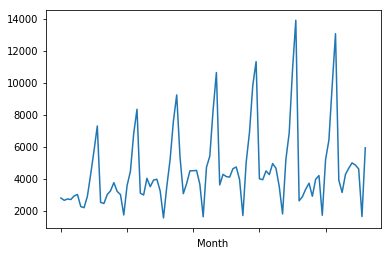

In [117]:
series.plot()
plt.show()

It seems there is a seasonality in this time series. 

## Box and Whisker Plots

/Users/jacquesthibodeau/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  app.launch_new_instance()


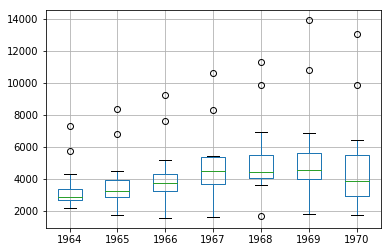

In [127]:
series = pd.read_csv('dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
# print(series)
groups = series['1964':'1970'].groupby(pd.TimeGrouper('A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

** need to fix plot